<html>
<body>
<h1 style="background-color: #5B2071;"><center>
    <br><font size="+3.5">
    <font color=#FFBF00><b> ⚡ Household Electricity Consumption ⚡ </b></font>
   </font>
    <br><font size="+1">
    <font color=#FFBF00> Objective: Determine the different factors influencing urban and rural household electricity consumption </font>
   </font> 
    <br><font size="+1">
    <font color=#FFBF00>Group: Electricity</font>
   </font> 
    <br><font size="+1">
    <font color=#FFBF00>September 8, 2024</font>
   </font>
    </center>
</h1>
</body>
</html>

<html>
<h2 style="background-color: #5B2071;">
<font size="+2"><br>
    <font color=#FFBF00><b>&nbsp;   &nbsp; Data Source</b></font>
    </font>  <br>
</h2>
</html>

<strong>Data source</strong>: https://www.kaggle.com/datasets/gireeshs/household-monthly-electricity-bill

The "Household monthly electricity bill" dataset available from www.kaggle.com contains mockup practice data for monthly utility bills of 1,000 hypothetical households in India. The dataset includes information such as the number of people in the home, number of children, the home size, whether the home is urban or rural, and the monthly bill amount for the household.

The dataset includes the following variables:

* <strong>num_rooms</strong>: Number of room in the house
* <strong>num_people</strong>: Number of people in the house
* <strong>housearea</strong>: Area of the house
* <strong>is_ac</strong>: Whether Air Conditioning is present in the house
* <strong>is_tv</strong>: Whether a TV is present in the house
* <strong>is_flat</strong>: If the house is an apartment (flat)
* <strong>ave_monthly_income</strong>: Average monthly income of the household
* <strong>num_children</strong>: Number of children in the house
* <strong>is_urban</strong>: Whether the house is located in an urban area
* <strong>amount_paid</strong>: Amount paid as the monthly bill

<html>
<h2 style="background-color: #5B2071;">
<font size="+2"><br>
    <font color=#FFBF00><b>&nbsp;   &nbsp; Introduction & Overview</b></font>
    </font>  <br>
</h2>
</html>

### Household Energy Consumption Background

It is well-known that a common household energy cost burden is related to higher energy consumption and higher monthly utility bills. Household energy use is influenced by a combination of factors, including home efficiency, variation in home appliance technologies, and lifestyle choices. Modern conveniences with an increasing reliance on electronic devices contribute significantly to energy use. Heating, Ventilation, and Air Conditioning (HVAC) is often a major contributor to household energy consumption. Less energy efficient appliances and older or poorly insulated homes tend to lose heat more rapidly, necessitating more energy for heating and cooling. Lifestyle habits, such as frequent use of high-energy appliances and inconsistent maintenance, can further lead to higher energy costs.

### Major Factors Influencing Household Energy Consumption

Household size, both in house footprint area, and number of inhabitants, can be strong indicators of household energy consumption. In homes with air conditioning, larger household footprint areas require more energy to keep a greater volume of air cool during higher outside temperatures. In addition, as the number of people living in a shared home increase, the time that household appliances are used and the number of used electronic devices also increases. 

### Objective

Reducing household electricity consumption can reduce the carbon footrint of a home and substantially lower monthly household energy costs, so understanding the factors that are most strongly associated with lower electricity use can have a positive impact on both people and the planet. We aim to identify the factors that are most likely to help lower eletricity consumption in urban homes and in rural homes.

### Hypothesis

The factors which impact the bill in rural areas are different from the factors which impact a bill in urban areas.

This data analysis will explore the hypothesis that the factors that are most strongly associated with higher monthly bill amounts in urban homes will be different than for rural homes.

<html>
<h2 style="background-color: #5B2071;">
<font size="+2"><br>
    <font color=#FFBF00><b>&nbsp;   &nbsp; Data Ingestion</b></font>
    </font>  <br>
</h2>
</html>

In [49]:
# If you will be using os or matplotlib for the first time on this machine, pip install os and/or matplotlib

# pip3 install matplotlib

In [50]:
# Import packages 
import os 
import numpy as np
import pandas as pd
from scipy.stats import mannwhitneyu

# Plotting packages
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

# Regression packages
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [51]:
## Read the Data

directory = os.getcwd()

file_path = os.path.join(directory, "Household energy bill data.csv")
    
electricity = pd.read_csv(file_path)

<html>
<h2 style="background-color: #5B2071;">
<font size="+2"><br>
    <font color=#FFBF00><b>&nbsp;   &nbsp; Data Cleaning</b></font>
    </font>  <br>
</h2>
</html>

As part of data cleaning, we first check all columns to ensure that all rows are fully populated. In the below table we see that the Non-Null count matches the total number of rows for every column.

In [52]:
# checking the data set for null values to ensure all rows are fully populated
electricity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   num_rooms           1000 non-null   int64  
 1   num_people          1000 non-null   int64  
 2   housearea           1000 non-null   float64
 3   is_ac               1000 non-null   int64  
 4   is_tv               1000 non-null   int64  
 5   is_flat             1000 non-null   int64  
 6   ave_monthly_income  1000 non-null   float64
 7   num_children        1000 non-null   int64  
 8   is_urban            1000 non-null   int64  
 9   amount_paid         1000 non-null   float64
dtypes: float64(3), int64(7)
memory usage: 78.3 KB


A quick examination of the basic statistics (e.g. min, max values) to ensure they are within the range of reasonable values reveals that there are a few data issues. In some of the data, "num_rooms", "num_people", and "ave_monthly_income" are negative. This cannot be true, so this data is considered an anamoly. 

In [53]:
electricity.describe()

,num_rooms,num_people,housearea,is_ac,is_tv,is_flat,ave_monthly_income,num_children,is_urban,amount_paid
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,1.962000,4.897000,794.703420,0.376000,0.798000,0.477000,24684.986550,1.078000,0.608000,600.396359
std,1.030348,2.007591,147.771736,0.484622,0.401693,0.499721,9678.228224,0.934232,0.488441,181.406210
min,-1.000000,-1.000000,244.400000,0.000000,0.000000,0.000000,-1576.440000,0.000000,0.000000,87.851850
25%,1.000000,4.000000,691.037500,0.000000,1.000000,0.000000,18036.762500,0.000000,0.000000,475.065141
50%,2.000000,5.000000,789.970000,0.000000,1.000000,0.000000,24742.575000,1.000000,1.000000,598.331726
75%,3.000000,6.000000,892.955000,1.000000,1.000000,1.000000,31402.357500,2.000000,1.000000,729.930489
max,5.000000,11.000000,1189.120000,1.000000,1.000000,1.000000,56531.080000,4.000000,1.000000,1102.994109


During data exploration, it was also found that this dataset includes records where the number of people in the household is zero. These records are also removed, since we are interested in electricity consumption for residential households.

In [54]:
electricity = electricity[
    (electricity['num_people'] > 0) & 
    (electricity['num_rooms'] >= 0) & 
    (electricity['ave_monthly_income'] >= 0)
]
electricity.describe()

,num_rooms,num_people,housearea,is_ac,is_tv,is_flat,ave_monthly_income,num_children,is_urban,amount_paid
count,972.000000,972.000000,972.000000,972.000000,972.000000,972.000000,972.000000,972.000000,972.000000,972.000000
mean,1.966049,4.982510,794.185967,0.375514,0.797325,0.473251,24866.186646,1.072016,0.604938,599.241151
std,1.011713,1.907409,147.580693,0.484505,0.402199,0.499541,9521.367854,0.929524,0.489116,181.361377
min,0.000000,1.000000,244.400000,0.000000,0.000000,0.000000,37.780000,0.000000,0.000000,87.851850
25%,1.000000,4.000000,690.810000,0.000000,1.000000,0.000000,18393.842500,0.000000,0.000000,475.021038
50%,2.000000,5.000000,788.165000,0.000000,1.000000,0.000000,24837.720000,1.000000,1.000000,594.386005
75%,3.000000,6.000000,893.287500,1.000000,1.000000,1.000000,31464.822500,2.000000,1.000000,727.495840
max,5.000000,11.000000,1189.120000,1.000000,1.000000,1.000000,56531.080000,4.000000,1.000000,1102.994109


#### Convert Rupees to Dollars

The dataset includes economic data from hypothetical households in India during 2020.  In order to understand the currency amounts more clearly, convert the currency amounts to US dollars using the US dollar to Indian rupee exchange rate from 2020 (1 US dollar = 71.76 Indian rupees)

In [55]:
# Use the Dollar to Rupee exchange rate to convert Rupees to Dollars

# First create the data values that will be used to populate the new data fields
ave_mo_income_dollar = electricity.ave_monthly_income / 71.76
amount_paid_dollar = electricity.amount_paid / 71.76

# Create new data fields and assign the corresponding variables 
electricity.insert(7, 'ave_mo_income_dollar', ave_mo_income_dollar)
electricity.insert(11, 'amount_paid_dollar', amount_paid_dollar)

electricity.drop(["ave_monthly_income", "amount_paid"], axis = 1, inplace = True)

electricity.head()

,num_rooms,num_people,housearea,is_ac,is_tv,is_flat,ave_mo_income_dollar,num_children,is_urban,amount_paid_dollar
0,3,3,742.57,1,1,1,134.837375,2,0,7.810500
1,1,5,952.99,0,1,0,488.639771,1,1,8.825023
2,3,1,761.44,1,1,1,310.652731,0,0,7.133210
3,0,5,861.32,1,1,0,169.162207,0,0,4.640357
4,1,8,731.61,0,1,0,240.107302,2,1,9.173434


<html>
<h2 style="background-color: #5B2071;">
<font size="+2"><br>
    <font color=#FFBF00><b>&nbsp;   &nbsp; Exploratory Data Analysis and Visualization</b></font>
    </font>  <br>
</h2>
</html>

Examining the clean dataset shows that there are ten variables with 972 observations.

In [56]:
#determine number of data rows and data fields in the dataset
print("Number of Observations and Number of Variables:")
print(electricity.shape)

electricity.sample(5)

Number of Observations and Number of Variables:
(972, 10)


,num_rooms,num_people,housearea,is_ac,is_tv,is_flat,ave_mo_income_dollar,num_children,is_urban,amount_paid_dollar
883,1,7,970.66,0,1,1,367.032051,3,1,11.178433
154,1,5,950.50,0,1,1,215.310201,0,0,5.779204
355,2,7,786.06,0,1,0,499.859253,2,1,9.145845
825,5,6,862.18,1,1,1,586.405797,0,1,12.169943
601,3,3,1027.08,0,0,0,185.803790,1,0,3.038550


### Rural vs Urban Electricity Bills


### Rural vs Urban split
A plot of the number of rural and urban households shows we have more data from urban households than rural households. This comparison is useful in ensuring that any analysis performed is based off of reasonable quantity of data.

In [77]:
#Set color palette
soft_colors_dict = {
    "Urban": "#1f77b4",  # Soft blue
    "Rural": "#FC8F32"   # Soft orange
}
soft_colors = [
    "#FC8F32",   # Soft orange
    "#1f77b4",  # Soft blue
]

#Plot pie chart 
electricity["household_type"] = electricity.apply(
    lambda row: "Urban" if row.is_urban > 0 else "Rural", axis=1
)

fig = px.pie(electricity.sort_values("household_type"), 
             names="household_type", 
             title="Rural vs Urban split",
             color="household_type", 
             color_discrete_map=soft_colors_dict)
fig.update_layout(width=500)
fig.update_traces(textposition="inside", textinfo="percent+label")
fig.show()


We see a 60/40 split favoring Urban which gives us close to 400 records for Rural data. This is considered enough stastical data to check the hypothesis. Next a stastical analysis of the electricity bill paid for Rural and Urban shows clear distinguishing trends.

In [58]:
electricity.groupby("household_type")["amount_paid_dollar"].describe()

,count,mean,std,min,25%,50%,75%,max
household_type,,,,,,,,
Rural,384.0,6.324918,1.875662,1.224245,5.009186,6.348451,7.528403,11.837058
Urban,588.0,9.673543,1.957789,5.248371,8.213982,9.588786,11.056706,15.370598


We see that in the 384 Rural data points, the mean is lower than then 588 data points of Urban by $3.35. The mean Rural amount paid is oly 65% of the mean Urban amount. The minimum value is seen in a Rural hosuehold and it is $4.02 lesser than Urban. Urban household also has the max bill amount which is greater than the maximum paid in rural by around $3.53. Each of the Rural quartiles are also only 60% of the Urban. 

The data clearly shows that Urban households pay higher electricity bills than rural households. This is also seen visually in the chart below.

In [100]:
fig = px.histogram(
    electricity.sort_values(["household_type"]), 
    x="amount_paid_dollar", 
    color="household_type", 
    title="Amount Paid for Rural and Urban households",
    labels={"amount_paid_dollar": "Amount Paid in Dollars", "household_type": "Household Type"},
    color_discrete_sequence=soft_colors)

fig.show()

### Number of Rooms and Residents in the Home
The following histograms plot Number of rooms, Number of people and Number of children across Urban and Rural households.

In [105]:
#Set color palette
blue_colors = [
    "#cce5ff",  # Light blue
    "#a6cee3",  # Pastel blue
    "#1f78b4",  # Standard blue
    "#3C5291",  # Dark blue
    "#212E52",  # Darker blue
    "#4b0082",  # Indigo blue
    "#553D6B",  # Purple
    "#8761AB",  # Medium purple
    "#BA86EB",   # Light purple
    "#BB85AB",   # Mauve
    "#C6A1CF"   # Lilac
]

#Plot histogram
fig = px.histogram(
    electricity.sort_values(["household_type", "num_rooms"]),
    y="household_type",
    color="num_rooms",
    barmode="stack",
    barnorm="percent",
    title="Number of Rooms in Rural and Urban Households",
    labels={"num_rooms": "Number of Rooms", "household_type": "Household Type"},
    color_discrete_sequence=blue_colors
)

fig.show()


In [102]:
fig = px.histogram(
    electricity.sort_values(["household_type", "num_people"]),
    y="household_type",
    color="num_people",
    barmode="stack",
    barnorm="percent",
    title="Number of People in Rural and Urban Homes",
    labels={"num_people": "Number of People", "household_type": "Household Type"},
    color_discrete_sequence=blue_colors
)

fig.show()

In [104]:
fig = px.histogram(
    electricity.sort_values(["household_type", "num_children"]),
    y="household_type",
    color="num_children",
    barmode="stack",
    barnorm="percent",
    title="Children in Rural vs Urban",
    labels={"year": "Year", "diet": "Diet", "household_type":"Household Type"},
    color_discrete_sequence=blue_colors
)
fig.show()

The histograms show a surprisingly similar distribution in the number of rooms, number of people, and number of children in urban households, compared to rural households. 

**This hints at these 3 categories not being very interesting for the difference in amount paid between Rural and Urban households.**

### AC Status by Household Type
The plot of AC in rural and urban areas shows that Rural households are 5% more likely to have an AC.

In [106]:
fig = px.histogram(
    electricity.sort_values("household_type").sort_values("is_ac", ascending=False),
    y="household_type",
    color="is_ac",
    barmode="stack",
    barnorm="percent",
    title="AC unit in Urban and Rural",
    labels={"is_ac": "Has AC?", "household_type": "Household Type"},
    color_discrete_map={1: "#1f78b4", 0:"rgba(0,0,0,0)"}
)
fig.update_layout(showlegend=False)
fig.show()


### TV Status by Household Type
The plot shows that both Urban and Rural have a very similar probabilty of having a TV. Having the same probability removes presence of TV as a factor when comparing electricity bills between rural and urban.

In [107]:
fig = px.histogram(
    electricity.sort_values("household_type").sort_values("is_tv", ascending=False),
    y="household_type",
    color="is_tv",
    barmode="stack",
    barnorm="percent",
    title="TV in Urban and Rural",
    labels={"is_tv": "Has TV?", "household_type": "Household Type"},
    color_discrete_map={1: "#1f78b4", 0:"rgba(0,0,0,0)"}
)
fig.update_layout(showlegend=False)
fig.show()

**The TV and AC statistics also alone dont justify a 40% lower bill between Rural and Urban households.**

In [20]:
# Drop temporary column household_type
electricity = electricity.drop("household_type", axis=1)

<html>
<h2 style="background-color: #5B2071;">
<font size="+2"><br>
    <font color=#FFBF00><b>&nbsp;   &nbsp; Data Visualization </b></font>
    </font>  <br>
</h2>
</html>

### Factors Correlated with a Higher Electricity Bill

A heat map correlation matrix of the dataset highlights that the monthly electricity bill is highly correlated with:
* Whether the household is <strong>urban</strong>
* The <strong>number of children</strong> in the household
* Whether there is <strong>air conditioning</strong> in the home

There is a lower correlation with a few additional variables:
* Whether there is a <strong>TV</strong> in the home
* Whether the home is an <strong>apartment</strong>
* The <strong>household area</strong>

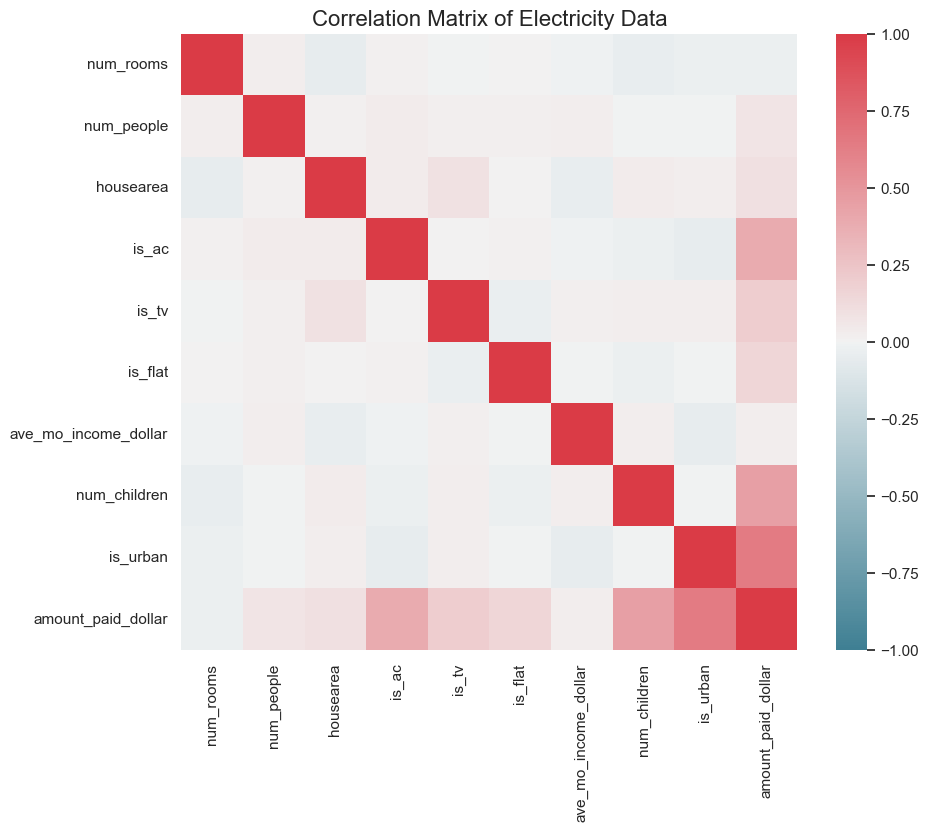

In [21]:
f, ax = plt.subplots(figsize=(10, 8))
corr = electricity.corr()
sns.heatmap(corr,
    cmap=sns.diverging_palette(220, 10, as_cmap=True),
    vmin=-1.0, vmax=1.0,
    square=True, ax=ax)
ax.set_title('Correlation Matrix of Electricity Data', fontsize=16)
plt.show()

A more detailed correlation plot dives deeper into these relationships.
* There is a strong positive relationship between the <strong>number of children</strong> in the household and the amount paid.
* Both the houshold area and the electricity bill amount show a fairly <strong>normal distribution</strong>.
* Surprisingly, household area is <strong>not</strong> strongly correlated with the electricity bill amount.

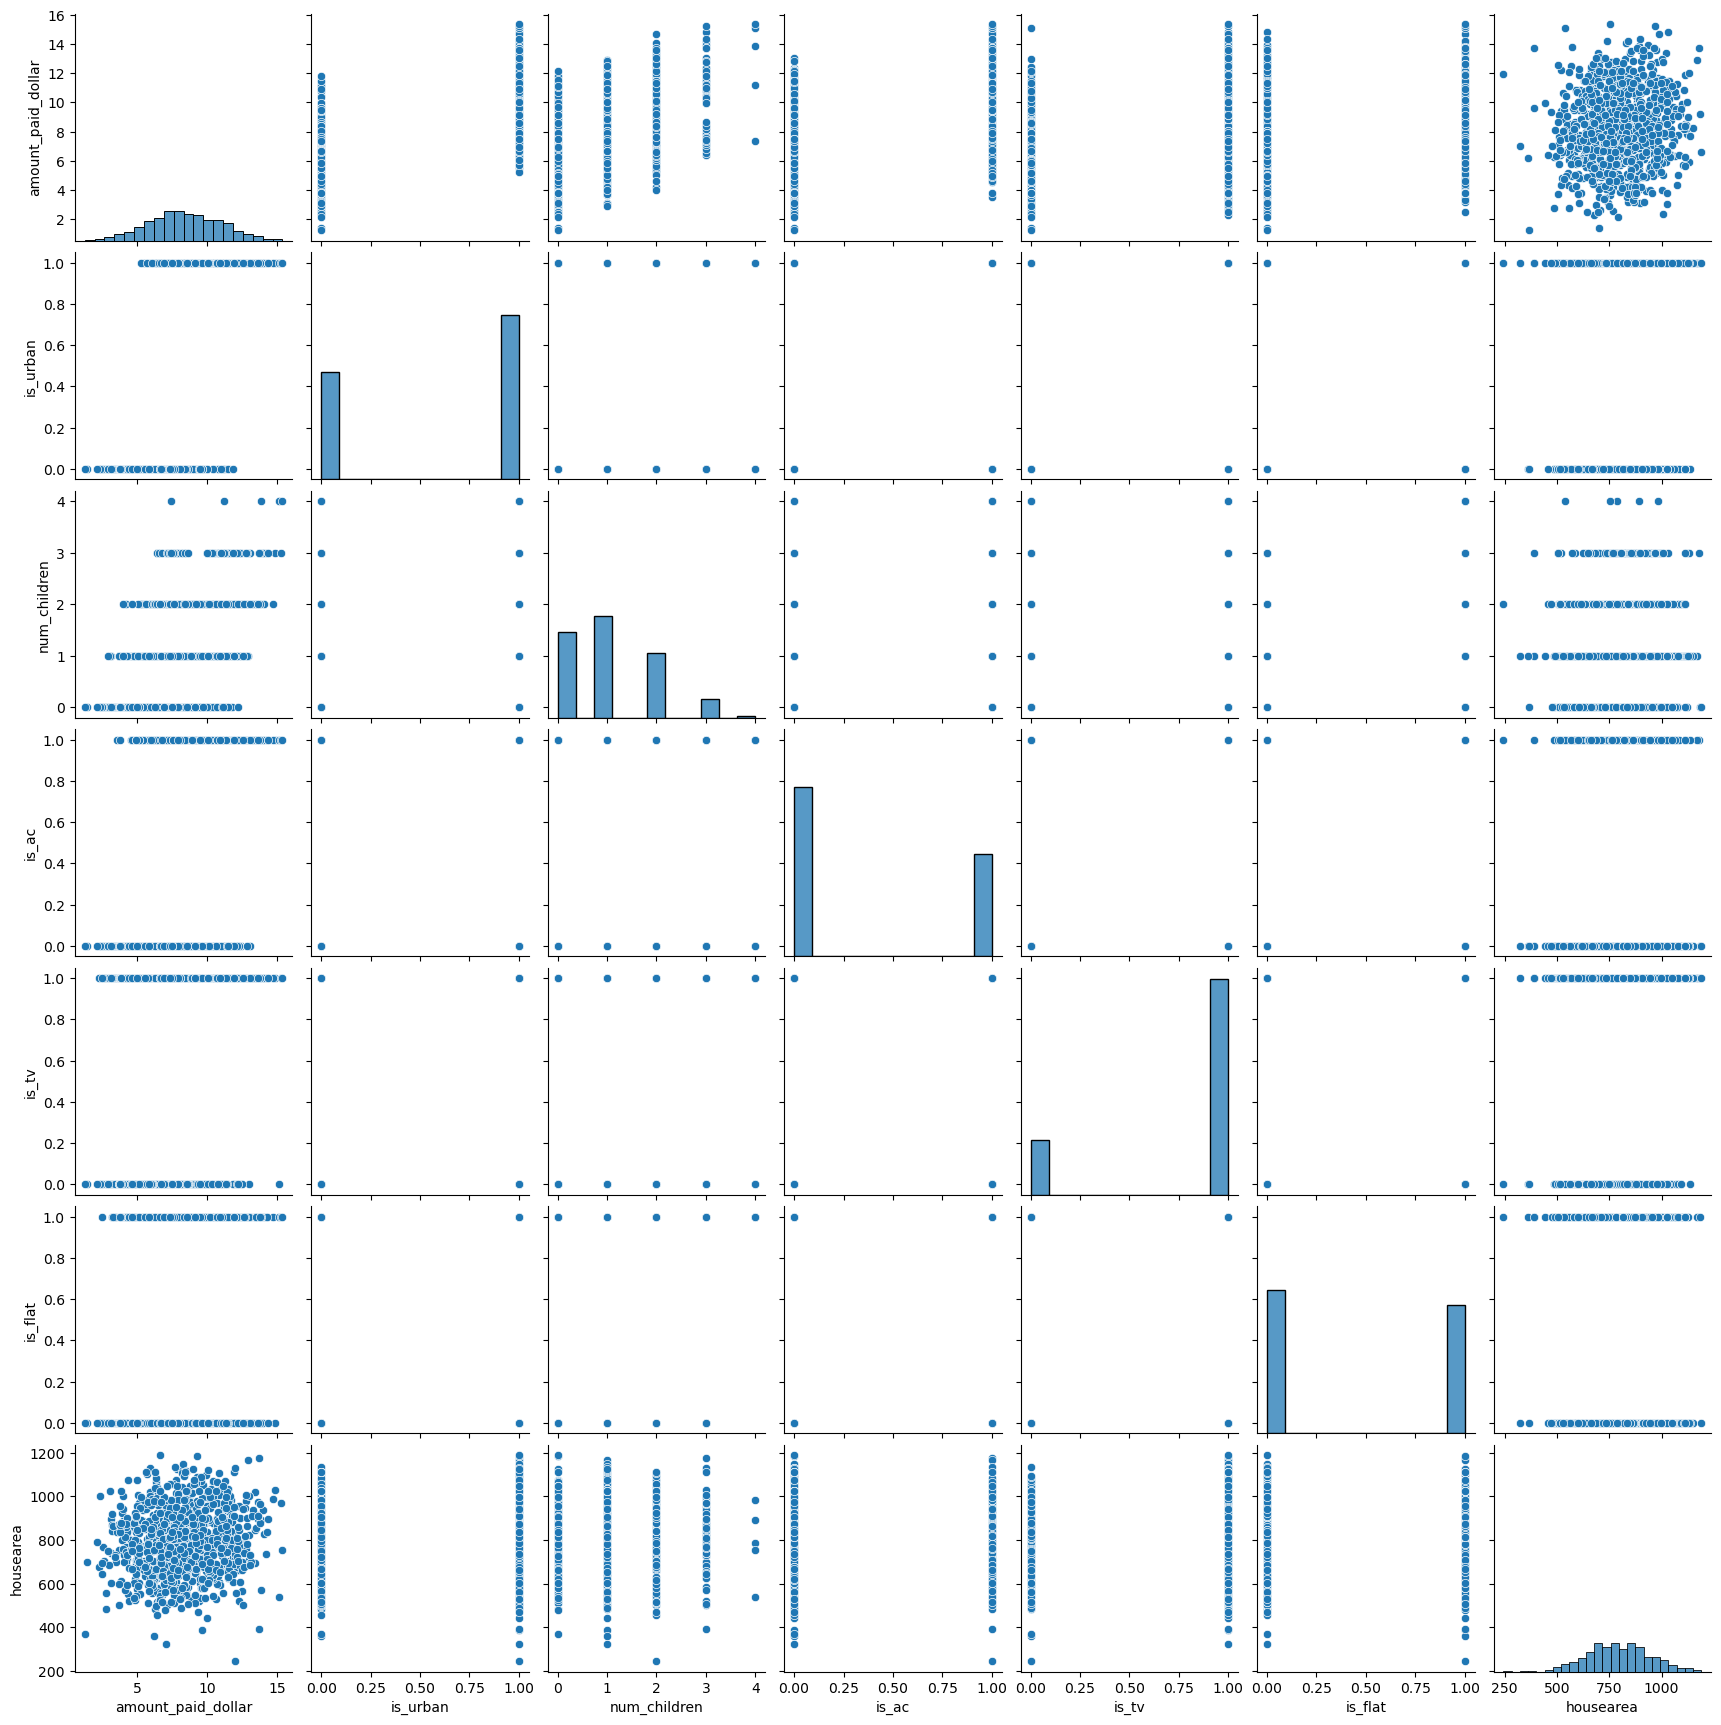

In [17]:
# Create correlogram of variables of interest
var_interest = ["amount_paid_dollar","is_urban","num_children","is_ac","is_tv","is_flat","housearea"]
sns.pairplot(electricity[var_interest])
plt.show()


### Positive Correlation Between Number of Children and Electricity Bill Amount

A scatterplot of the dataset shows that the number of children in the household has a strong relationship with the monthly elecricity bill:
* Household electricity bill increases with the number of children in the household.  
* Overall, urban households have a higher electricity bill than rural households.

In [18]:
#Plot a scatter plot of the electricity bill by number of children
#show urban/rural homes by color, and size of the household by point size
fig = px.scatter(electricity, x="amount_paid_dollar", y="num_children", color="is_urban",
                 size='housearea', labels={'amount_paid_dollar':'Electricity Bill', 'num_children':'No. of Children'})
fig.show()


### Higher Average Costs for Urban Households Compared to Rural Households

A Box and Whisker Plot for Urban and Rural Households shows a <strong>statistically significant</strong> difference between the two subsets of the data.
* The amount paid is higher in urban households compared to rural households

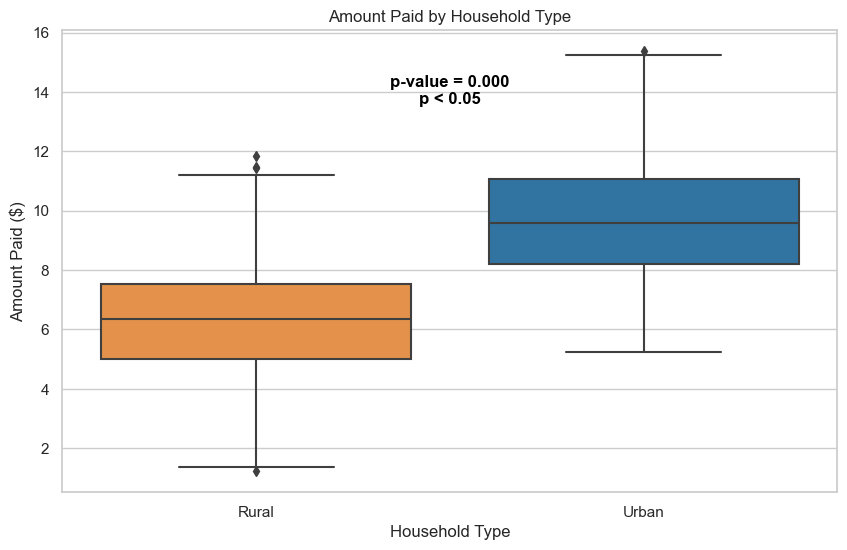

In [45]:
# Create color palette
soft_colors = {
    0: "#FC8F32",   # Soft orange
    1: "#1f77b4"  # Soft blue
}

# Define custom x-axis labels
custom_labels = {
    0: "Rural",
    1: "Urban"
}

# Create Box and Whisker Plot
sns.set(style='whitegrid')
amount_paid_dollar = electricity["amount_paid_dollar"] 
Household_type = electricity["is_urban"]
 
plt.figure(figsize=(10, 6))
ax = sns.boxplot(x=Household_type, y=amount_paid_dollar, data=electricity, palette=soft_colors)

# Set x-axis labels
ax.set_xticks(list(custom_labels.keys()))  # Ensure the ticks are set properly
ax.set_xticklabels([custom_labels[label] for label in custom_labels.keys()])

# Perform statistical test
rural_amounts = amount_paid_dollar[Household_type == 0]
urban_amounts = amount_paid_dollar[Household_type == 1]
stat, p_value = mannwhitneyu(rural_amounts, urban_amounts)

# Add significance annotation
y_max = amount_paid_dollar.max() - 2  # Use the maximum y value for placing the annotation
significance_label = "p < 0.05" if p_value < 0.05 else "p >= 0.05"
ax.text(0.5, y_max * 1.05, f"p-value = {p_value:.3f}\n{significance_label}",
        horizontalalignment='center', verticalalignment='center', color='black',
        fontsize=12, fontweight='bold')

# Customize the plot with titles and labels
ax.set_title("Amount Paid by Household Type")
ax.set_xlabel("Household Type")
ax.set_ylabel("Amount Paid ($)")


# Customize the plot with titles and labels
ax.set_title("Amount Paid by Household Type")
ax.set_xlabel("Household Type")
ax.set_ylabel("Amount Paid ($)")

plt.show()

Plotting correlograms for the electricity bill data split into two subsets (urban and rural homes) shows similar relationships between the variables, but with some slight differences:
* For both datasets, <strong>number of children</strong> and presence of an <strong>A/C in the home</strong> are most strongly associated with a higher bill
* Whether there is a <strong>TV present</strong>, the <strong>household area</strong>, and the <strong>number of people in the home</strong> are more strongly have a slightly higher correlation with the bill amount in urban households compared to rural households

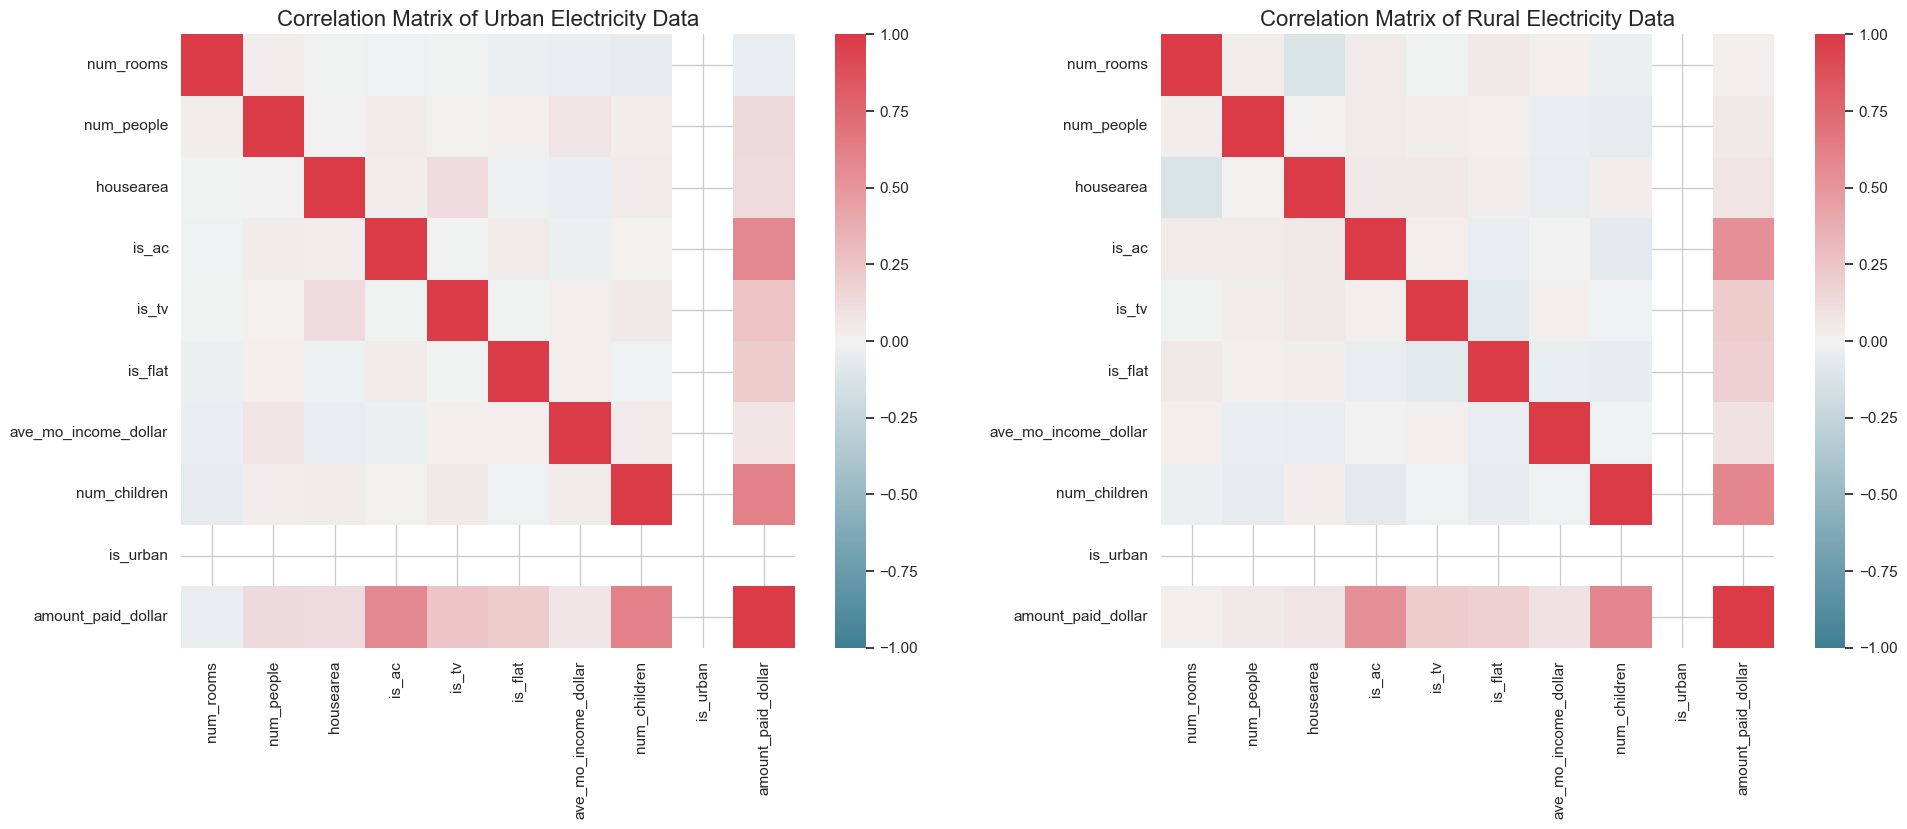

In [46]:
#Plot two correlograms next to eachother to see if there are different correlations in urban vs. rural homes

# Filter the data into subsets based on urban/rural status
urban = electricity[(electricity["is_urban"] == 1)]
rural = electricity[(electricity["is_urban"] == 0)]

# Compute correlation matrices
corr_urban = urban.corr()
corr_rural = rural.corr()

# Create subplots
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Plot first correlogram
sns.heatmap(corr_urban,
            cmap=sns.diverging_palette(220, 10, as_cmap=True),
            vmin=-1.0, vmax=1.0,
            square=True, ax=ax1)
ax1.set_title('Correlation Matrix of Urban Electricity Data', fontsize=16)

# Plot second correlogram
sns.heatmap(corr_rural,
            cmap=sns.diverging_palette(220, 10, as_cmap=True),
            vmin=-1.0, vmax=1.0,
            square=True, ax=ax2)
ax2.set_title('Correlation Matrix of Rural Electricity Data', fontsize=16)

plt.tight_layout()
plt.show()

<html>
<h2 style="background-color: #5B2071;">
<font size="+2"><br>
    <font color=#FFBF00><b>&nbsp;   &nbsp; Data Modeling </b></font>
    </font>  <br>
</h2>
</html>

Running regression models on the Electricity data.

First, developing a model to predict the bill amount from a given house area:

\begin{equation}
Electricity Bill (\$) = {\beta}_0 + {\beta}_1 (NumberChildren)
\end{equation}

In [80]:
#Showing no correlation between household area and the bill amount

#define predictor and response variables
y = electricity['amount_paid_dollar']
x = electricity['num_children']

#add constant to predictor variables
x = sm.add_constant(x)

#fit linear regression model
model_children = sm.OLS(y, x).fit()

#view model summary
print(model_children.summary())

                            OLS Regression Results                            
Dep. Variable:     amount_paid_dollar   R-squared:                       0.205
Model:                            OLS   Adj. R-squared:                  0.204
Method:                 Least Squares   F-statistic:                     249.8
Date:                Fri, 30 Aug 2024   Prob (F-statistic):           3.07e-50
Time:                        16:13:54   Log-Likelihood:                -2168.6
No. Observations:                 972   AIC:                             4341.
Df Residuals:                     970   BIC:                             4351.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            7.0316      0.110     63.671   

This is the resulting predictive model:

\begin{equation}
\hat{Electricity Bill (\$)}_i =  7.0316 + 1.2304 * (Number Children)
\end{equation}

The R-squared value of this linear regression (0.205) is low.

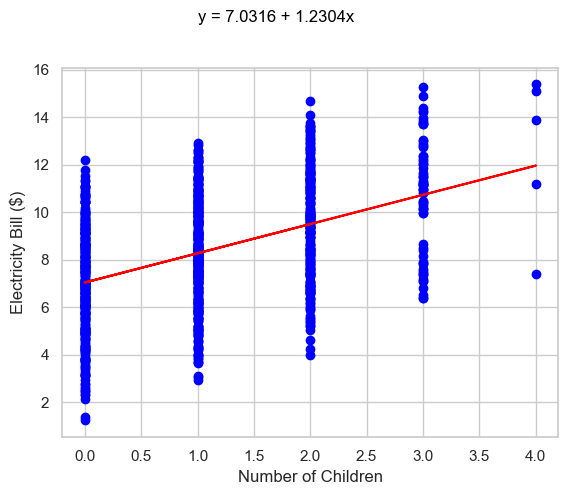

In [83]:

import matplotlib.pyplot as plt
import numpy as np

#add points to plot
plt.scatter(electricity['num_children'], electricity['amount_paid_dollar'], color='blue')

#find line of best fit
a, b = np.polyfit(electricity['num_children'], electricity['amount_paid_dollar'], 1)

#add line of best fit to plot
plt.plot(electricity['num_children'], a*electricity['num_children']+b, color = 'red')

#add fitted regression equation to plot
plt.text(1, 18, 'y = ' + '{:.4f}'.format(b) + ' + {:.4f}'.format(a) + 'x', size=12, color= 'black')

#add axis labels
plt.xlabel('Number of Children')
plt.ylabel('Electricity Bill ($)')

plt.show()

### Continuing to investigate factors which most strongly predict a higher Electricity Bill:
    
We further examined if AC presence would improve the fit of the predictive model for all households:

\begin{equation}
Amount Paid ($) = {\beta}_0 + {\beta}_1 (Number of Children) + {\beta}_2 (ACpresence)
\end{equation}

In [71]:
#define predictor and response variables
y = electricity['amount_paid_dollar']
x = electricity[['num_children','is_ac']]


#add constant to predictor variables
x = sm.add_constant(x)

#fit linear regression model
model = sm.OLS(y, x).fit()

#view model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:     amount_paid_dollar   R-squared:                       0.367
Model:                            OLS   Adj. R-squared:                  0.365
Method:                 Least Squares   F-statistic:                     280.5
Date:                Fri, 30 Aug 2024   Prob (F-statistic):           7.96e-97
Time:                        16:01:14   Log-Likelihood:                -2057.9
No. Observations:                 972   AIC:                             4122.
Df Residuals:                     969   BIC:                             4137.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            6.2130      0.111     55.728   

This is the resulting predictive model:

\begin{equation}
Amount Paid (\$) = 6.2130 +  1.2586 * (Number of Children) + 2.0993 * (ACpresence)
\end{equation}

The R-squared value of this linear regression (0.37) is much higher than the previous model.

Notably, the p value for both variables is very low.

### Urban Households: Predictive Factors for a Higher Electricity Bill
    
Since we know that the bill amount is higher for urban households compared to rural households, we investigated whether the fit of the predicted model would be improved by looking only at urban households:

\begin{equation}
Amount Paid (\$)_{Urban} = {\beta}_0 + {\beta}_1 (Number of Children) + {\beta}_2 (AC present)
\end{equation}

In [84]:
#define predictor and response variables
y = urban['amount_paid_dollar']
x = urban[['num_children','is_ac']]


#add constant to predictor variables
x = sm.add_constant(x)

#fit linear regression model
urban_model = sm.OLS(y, x).fit()

#view model summary
print(urban_model.summary())

                            OLS Regression Results                            
Dep. Variable:     amount_paid_dollar   R-squared:                       0.703
Model:                            OLS   Adj. R-squared:                  0.702
Method:                 Least Squares   F-statistic:                     691.0
Date:                Fri, 30 Aug 2024   Prob (F-statistic):          9.10e-155
Time:                        16:24:01   Log-Likelihood:                -872.35
No. Observations:                 588   AIC:                             1751.
Df Residuals:                     585   BIC:                             1764.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            7.4686      0.075     99.892   

This is the resulting predictive model:

\begin{equation}
Amount Paid (\$)_{Urban} = 7.4686 +  1.2873 * (Number of Children) + 1.23416 * (ACpresence)
\end{equation}

The R-squared value of this linear regression (0.70) is much higher than the previous model. 

The cost of having an AC is $1.23 and every child adds $1.28 to the amount paid. The constant for urban households is $7.46.

### Rural Households: Predictive Factors for a Higher Electricity Bill
    
Developing a model to predict the bill amount from the number of children in the household and whether an AC is present:

\begin{equation}
Amount Paid (\$)_{Rural} = {\beta}_0 + {\beta}_1 (Number of Children) + {\beta}_2 (AC present)
\end{equation}

In [78]:
#define predictor and response variables
y = rural['amount_paid_dollar']
x = rural[['num_children','is_ac']]


#add constant to predictor variables
x = sm.add_constant(x)

#fit linear regression model
rural_model = sm.OLS(y, x).fit()

#view model summary
print(rural_model.summary())

                            OLS Regression Results                            
Dep. Variable:     amount_paid_dollar   R-squared:                       0.668
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     383.2
Date:                Fri, 30 Aug 2024   Prob (F-statistic):           6.11e-92
Time:                        16:09:31   Log-Likelihood:                -574.21
No. Observations:                 384   AIC:                             1154.
Df Residuals:                     381   BIC:                             1166.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            4.0823      0.098     41.475   

This is the resulting predictive model:

\begin{equation}
Amount Paid (\$)_{Rural} = 4.0823 +  1.2526 * (Number of Children) + 2.1880 * (ACpresence)
\end{equation}

The R-squared value of this linear regression (0.67) is not substantially different than the previous model.

The cost of having an AC is $2.18 and every child adds $1.25 to the amount paid. The constant for urban households is $4.08.

| | Urban | Rural | Combined |
| --- | --- | --- | --- |
| R-squared value | 0.703 | 0.668 | 0.367 |
| Constant | 7.46 | 4.08 | 6.21 |
| Cost per child | 1.28 | 1.25 | 1.26 |
| Cost for AC | 1.23 | 2.18 | 2.1 |

The R-squared value suggests that the number of children and the presence of AC in the home is a strong predictor for both urban and rural households individually.  However, since the R squared value for the predictive model is much lower when attempting to predict the Electricity Bill amount in urban and rural households, this suggests that there is another unknown factor that is not included in these models that would be needed to explain the difference between urban and rural household electricity bills. The difference in constant also insinuates that Urban hosueholds pay a higher base rate.

<html>
<h2 style="background-color: #5B2071;">
<font size="+2"><br>
    <font color=#FFBF00><b>&nbsp;   &nbsp; Results & Recommendations </b></font>
    </font>  <br>
</h2>
</html>

The objective of this project was to review the new data set of electricty bills in Urban and Rural households and determine the factors which influence the cost in Urban and Rural households. This new data set had some valuable information but was missing some critical information like energy units consumed and rate per unit of energy. The availabiltiy of those fields would have helped create a more robust and accurate model.

The hypothesis of this project was that the factors which influence the electricity bill in rural households was different from the factors in Urban households.

The heat map and other data visualization proved that there are a couple of key contributing factors to the bill were Number of Children and Presence of AC, but the same factors were responsible for the bill in both Urban and Rural households. Data also showed that urban households consistently paid more than rural households. Next the project modelled the amount paid in urban and rural households hoping to find a strong correlation in coefficients for these factors in urban and rural. This exploration also did not provide conclusive results but the constant was starkly different in the urban vs rural households.

In summary, through this exercise, there was no strong evidence found to support the hypothesis that the factors contributing to electricity bill amounts are different in urban and rural households. It is possible that an outside variable (such as higher electricity rates in urban areas, compared to rural areas) may explain the higher cost in urban households, compared to rural households. To completely test the hypothesis, the data set would require additional data of electricity rates by region, units consumed, base tarrif levied, etc for further examination.
